# AI based application that predicts insurance charge for a customer.

## A. Import the required libraries

In [2]:
import pandas as pd
import keras as k
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
 

Using TensorFlow backend.


## B(I): Visualization of the Dataset 

In [3]:
df=pd.read_csv("insurance.csv")

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#df = df.dropna()

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


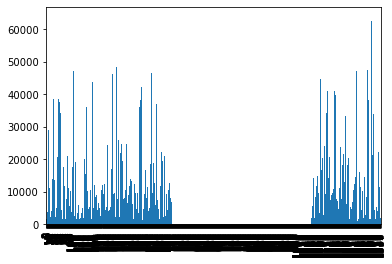

In [9]:
# View the unnormalized data
df['charges'].plot(kind='bar')

## B(II): Data Processing 

In [10]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [11]:
#Transform categorical data
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [12]:
in_variables = ['sex','smoker','region','age','bmi','children']
X = df[in_variables]
Y = df[['charges']]

sc=MinMaxScaler()   # Normalization
X = sc.fit_transform(X) 
Y = sc.fit_transform(Y)

In [13]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


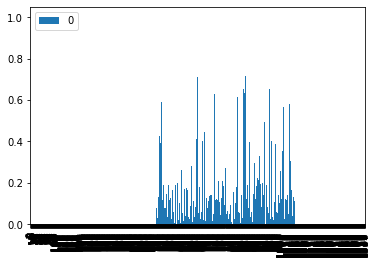

In [14]:
# Run the normalizer on the dataframe
df_Y = pd.DataFrame(Y)
# View the normalized data
df_Y.plot(kind='bar')

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # Spliting Data

In [16]:
# summarize
print('Train', X_train.shape, Y_train.shape)
print('Test', X_test.shape, Y_test.shape)

Train (1070, 6) (1070, 1)
Test (268, 6) (268, 1)


## C. Defining the Model

In [17]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


## C(II): Compile the model

In [18]:
model.compile(loss='mse', optimizer='adam',  metrics=['mse', 'mae', 'mape', 'cosine'])
# train model)

## C(II): Run the model

In [19]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=10,  verbose=1, validation_split=0.2)

Train on 856 samples, validate on 214 samples
Epoch 1/10
856/856 [==============================] - 1s 1ms/step - loss: 0.0619 - mse: 0.0619 - mae: 0.1710 - mape: 41037.7812 - cosine: 0.5946 - val_loss: 0.0415 - val_mse: 0.0415 - val_mae: 0.1482 - val_mape: 1054.1560 - val_cosine: 1.0000
Epoch 2/10
856/856 [==============================] - 0s 163us/step - loss: 0.0300 - mse: 0.0300 - mae: 0.1288 - mape: 187666.8750 - cosine: 0.9988 - val_loss: 0.0294 - val_mse: 0.0294 - val_mae: 0.1281 - val_mape: 924.7031 - val_cosine: 1.0000
Epoch 3/10
856/856 [==============================] - 0s 224us/step - loss: 0.0185 - mse: 0.0185 - mae: 0.1019 - mape: 144120.6406 - cosine: 0.9988 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0927 - val_mape: 489.7438 - val_cosine: 1.0000
Epoch 4/10
856/856 [==============================] - 0s 162us/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0798 - mape: 57103.9219 - cosine: 0.9988 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0755 - val_mape: 301.916

## C(III): Training performance visualization

dict_keys(['val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_cosine', 'loss', 'mse', 'mae', 'mape', 'cosine'])


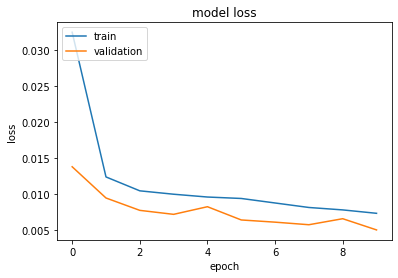

In [22]:
from matplotlib import pyplot as plt
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()